# <center> Supervised Model : Linear Regression 

## <center> Price prediction model for Audi vehicles



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

from IPython.display import HTML

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## I. Requirements

**Task is to build the ML model that predicts the sale price for Audi car. The mean absolute error (MAE) should not exceed 2.000 USD** 

## II. Data review and EDA

In [2]:
audi = pd.read_csv('audi.csv')

In [3]:
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'

    return(HTML(s+css))

View(audi)

In [4]:
display(audi.info())
display(audi.head())
display(audi.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


None

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0

year          price        mileage           tax           mpg  \
count  10668.000000   10668.000000   10668.000000  10668.000000  10668.000000   
mean    2017.100675   22896.685039   24827.244001    126.011436     50.770022   
std        2.167494   11714.841888   23505.257205     67.170294     12.949782   
min     1997.000000    1490.000000       1.000000      0.000000     18.900000   
25%     2016.000000   15130.750000    5968.750000    125.000000     40.900000   
50%     2017.000000   20200.000000   19000.000000    145.000000     49.600000   
75%     2019.000000   27990.000000   36464.500000    145.000000     58.900000   
max     2020.000000  145000.000000  323000.000000    580.000000    188.300000   

         engineSize  
count  10668.000000  
mean       1.930709  
std        0.602957  
min        0.000000  
25%        1.500000  
50%        2.000000  
75%        2.000000  
max        6.300000

Each vehicle is described with the following features: 

1. model - model of the vehicle
2. year - year of maufacturing
3. price - price (target feature)
4. transmission - transmission (manual, automatic, semiautomatic)
5. mileage - mileage
6. fuelType - engine type (petrol, diesel, hybrid)
7. tax - tax
9. mpg - fuel consumption 
10. engineSize - engine size

### 1. Filling gaps

In [5]:
audi[audi['engineSize'] == 0]

model  year  price transmission  mileage fuelType  tax    mpg  engineSize
7505    Q5  2019  44790    Automatic     5886   Petrol  135  117.7         0.0
7506    Q3  2019  32788    Automatic     1500   Diesel  145   47.1         0.0
7516    Q3  2020  29944       Manual     1500   Petrol  145   40.9         0.0
7517    Q3  2020  33333    Automatic     1500   Diesel  145   47.1         0.0
7518    Q3  2020  29944    Automatic     1500   Petrol  145   32.5         0.0
7519    Q3  2020  37990    Automatic     1500   Petrol  145   30.7         0.0
7521    Q5  2020  49790    Automatic     1500   Petrol  135  117.7         0.0
7542    Q3  2019  31888       Manual     2001   Petrol  145   40.4         0.0
7545    Q2  2020  24988    Automatic     1500   Petrol  145   42.2         0.0
7546    A3  2017  17390       Manual     7110   Petrol   30   60.1         0.0
7591    Q5  2019  33390    Automatic       45   Diesel  145   39.2         0.0
7598    A3  2019  22000       Manual     1500   Petrol  145   47.1         0.0
7611    Q3  2020  32444    Automatic     1500   Petrol  145   31.4         0.0
7625    A3  2019  23444    Automatic     1500   Petrol  145   44.1         0.0
7626    Q3  2020  32444    Automatic     1500   Petrol  145   31.4         0.0
7627    Q3  2020  37888    Automatic     1500   Petrol  145   30.7         0.0
7628    Q2  2019  24444       Manual     4000   Petrol  145   43.5         0.0
7631    A3  2019  23444    Automatic     4000   Petrol  145   44.1         0.0
7632    Q2  2020  24990       Manual     1500   Petrol  145   43.5         0.0
7641    S4  2020  44888    Automatic     1500   Diesel  145   39.2         0.0
7642    Q3  2019  32000    Automatic     4000   Petrol  145   31.4         0.0
7644   SQ5  2019  48800    Automatic     1500   Diesel  145   34.5         0.0
7647    Q3  2020  31990    Automatic     1500   Petrol  145   40.4         0.0
7649    Q2  2020  24888    Automatic     1500   Petrol  145   42.2         0.0
7659    Q3  2020  32444    Automatic     1500   Petrol  145   31.4         0.0
7662    Q2  2020  24990       Manual     1500   Petrol  145   43.5         0.0
7667    Q3  2020  33990    Automatic     1500   Diesel  145   47.1         0.0
7668    Q3  2020  30990       Manual     1500   Petrol  145   40.9         0.0
7669    Q3  2020  32444    Automatic     1500   Petrol  145   31.4         0.0
7670    Q3  2020  37888    Automatic      285   Petrol  145   30.7         0.0
7676    Q3  2020  33444    Automatic     1500   Petrol  145   31.4         0.0
7685    A4  2014  14950    Automatic    33894   Diesel  200   47.1         0.0
7688    S4  2019  39850    Automatic     4129   Diesel  145   40.4         0.0
7694    Q3  2020  30990       Manual     1500   Petrol  145   40.9         0.0
7698    Q3  2020  36790    Automatic     1330   Petrol  145   30.7         0.0
7700    Q5  2019  44450    Automatic     5225   Petrol  135  117.7         0.0
7711    A5  2019  27000       Manual     1325   Petrol  145   37.7         0.0
7718    S4  2019  45000    Automatic     4900   Diesel  145   40.4         0.0
7728   SQ5  2020  56450    Automatic     1500   Diesel  145   34.5         0.0
7732    Q3  2020  33990    Automatic     4000   Diesel  145   47.1         0.0
7739    Q3  2020  38888    Automatic     1500   Petrol  145   30.7         0.0
7740    Q3  2020  41888    Automatic     1500   Petrol  145   31.0         0.0
7741    Q2  2019  23888       Manual     1076   Petrol  145   43.5         0.0
7743    Q3  2020  29990    Automatic     1500   Diesel  145   47.1         0.0
7748    Q5  2020  38444    Automatic     1500   Petrol  145   32.1         0.0
7749    Q3  2020  29488       Manual     1500   Petrol  145   40.9         0.0
7762    Q3  2020  30000    Automatic     1500   Petrol  145   40.9         0.0
7835    A5  2015  16700    Automatic    45104   Diesel  125   58.9         0.0
7836    A5  2016  19000       Manual    26237   Diesel  150   56.5         0.0
7837    Q3  2017  19300       Manual    16051   Diesel 

In [6]:
print('Q5: {}'.format(audi[audi['model'] == ' Q5']['engineSize'].mode()[0]))
print('Q3: {}'.format(audi[audi['model'] == ' Q3']['engineSize'].mode()[0]))
print('Q2: {}'.format(audi[audi['model'] == ' Q2']['engineSize'].mode()[0]))

print('\n')

print('A3: {}'.format(audi[audi['model'] == ' A3']['engineSize'].mode()[0]))
print('A4: {}'.format(audi[audi['model'] == ' A4']['engineSize'].mode()[0]))
print('A5: {}'.format(audi[audi['model'] == ' A5']['engineSize'].mode()[0]))
print('A1: {}'.format(audi[audi['model'] == ' A1']['engineSize'].mode()[0]))

print('\n')

print('S4: {}'.format(audi[audi['model'] == ' S4']['engineSize'].mode()[0]))
print('SQ5: {}'.format(audi[audi['model'] == ' SQ5']['engineSize'].mode()[0]))
print('TT: {}'.format(audi[audi['model'] == ' TT']['engineSize'].mode()[0]))

Q5: 2.0
Q3: 2.0
Q2: 1.6


A3: 2.0
A4: 2.0
A5: 2.0
A1: 1.4


S4: 3.0
SQ5: 3.0
TT: 2.0


In [7]:
# replace value 0.0 in column 'engineSize' with mode values for each model according to above results

audi.loc[(audi['model'] == ' Q5') & (audi['engineSize'] == 0.0), 'engineSize'] = 2.0

audi.loc[(audi['model'] == ' Q3') & (audi['engineSize'] == 0.0), 'engineSize'] = 2.0

audi.loc[(audi['model'] == ' Q2') & (audi['engineSize'] == 0.0), 'engineSize'] = 1.6

audi.loc[(audi['model'] == ' A3') & (audi['engineSize'] == 0.0), 'engineSize'] = 2.0

audi.loc[(audi['model'] == ' A4') & (audi['engineSize'] == 0.0), 'engineSize'] = 2.0

audi.loc[(audi['model'] == ' A5') & (audi['engineSize'] == 0.0), 'engineSize'] = 2.0

audi.loc[(audi['model'] == ' A1') & (audi['engineSize'] == 0.0), 'engineSize'] = 1.4

audi.loc[(audi['model'] == ' S4') & (audi['engineSize'] == 0.0), 'engineSize'] = 3.0

audi.loc[(audi['model'] == ' SQ5') & (audi['engineSize'] == 0.0), 'engineSize'] = 3.0

audi.loc[(audi['model'] == ' TT') & (audi['engineSize'] == 0.0), 'engineSize'] = 2.0

### 2. New features

In [8]:
# creating new feature: interrelation between engine size and mg

audi['eS_mpg'] = audi['engineSize'] / audi['mpg']


# creating new feature: audi cars body type

sedan = [' A3', ' A4', ' A6', ' A8', ' RS3', ' RS4', ' RS6', ' S3', ' S4', ' S8']
SUV = [' Q2', ' Q3', ' Q5', ' Q7', ' Q8', ' SQ5', ' SQ7']
sportbacks = [' A5', ' A7', ' RS5', ' RS7', ' S5']
coupe = [' R8', ' TT']

def get_body_type(arg):
    
    if arg in sedan:
        return 'Sedan'
    elif arg in SUV:
        return 'SUV'
    elif arg in sportbacks:
        return 'Sportbacks'
    elif arg in coupe:
        return 'Coupe'
    else:
        return 'Other'
    
audi['bodyType'] = audi['model'].apply(get_body_type)

**Review the relation between price range and body type variaty as well as number of models**

In [9]:
body_price = audi.groupby('bodyType')['price'].agg(['min', 'max'])
print(body_price)

             min     max
bodyType                
Coupe       1990  145000
Other       2490   30950
SUV         6195   89990
Sedan       1490  109495
Sportbacks  5495   66990


In [10]:
model_price = audi.groupby('model')['price'].agg(['min', 'max'])
print(model_price)

         min     max
model               
 A1     4250   30950
 A2     2490    2490
 A3     1490   36990
 A4     1699   52000
 A5     5495   59995
 A6     2490   60000
 A7    11440   53750
 A8     4650   78990
 Q2    12745   40000
 Q3     7695   43990
 Q5     6195   67990
 Q7     8995   89990
 Q8    48022   89750
 R8    33950  145000
 RS3   15490   47990
 RS4   17999   71990
 RS5   23400   66990
 RS6   37000  109495
 RS7   33490   33490
 S3     4990   27995
 S4     5895   45888
 S5    11495   18950
 S8    24000   44991
 SQ5   17940   56450
 SQ7   43950   59950
 TT     1990   54995


**Conclusion: method cut() cannot be applied since the price data solit in random ways**

In [11]:
audi.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4   
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0   
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0   

     eS_mpg bodyType  
0  0.025271    Other  
1  0.031153    Sedan  
2  0.025271    Other  
3  0.029718    Sedan  
4  0.020161    Sedan

### 3. Outliers

In [12]:
types = audi.dtypes
numerical_features = list(types[(types != 'object')].index)

print(numerical_features)

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'eS_mpg']


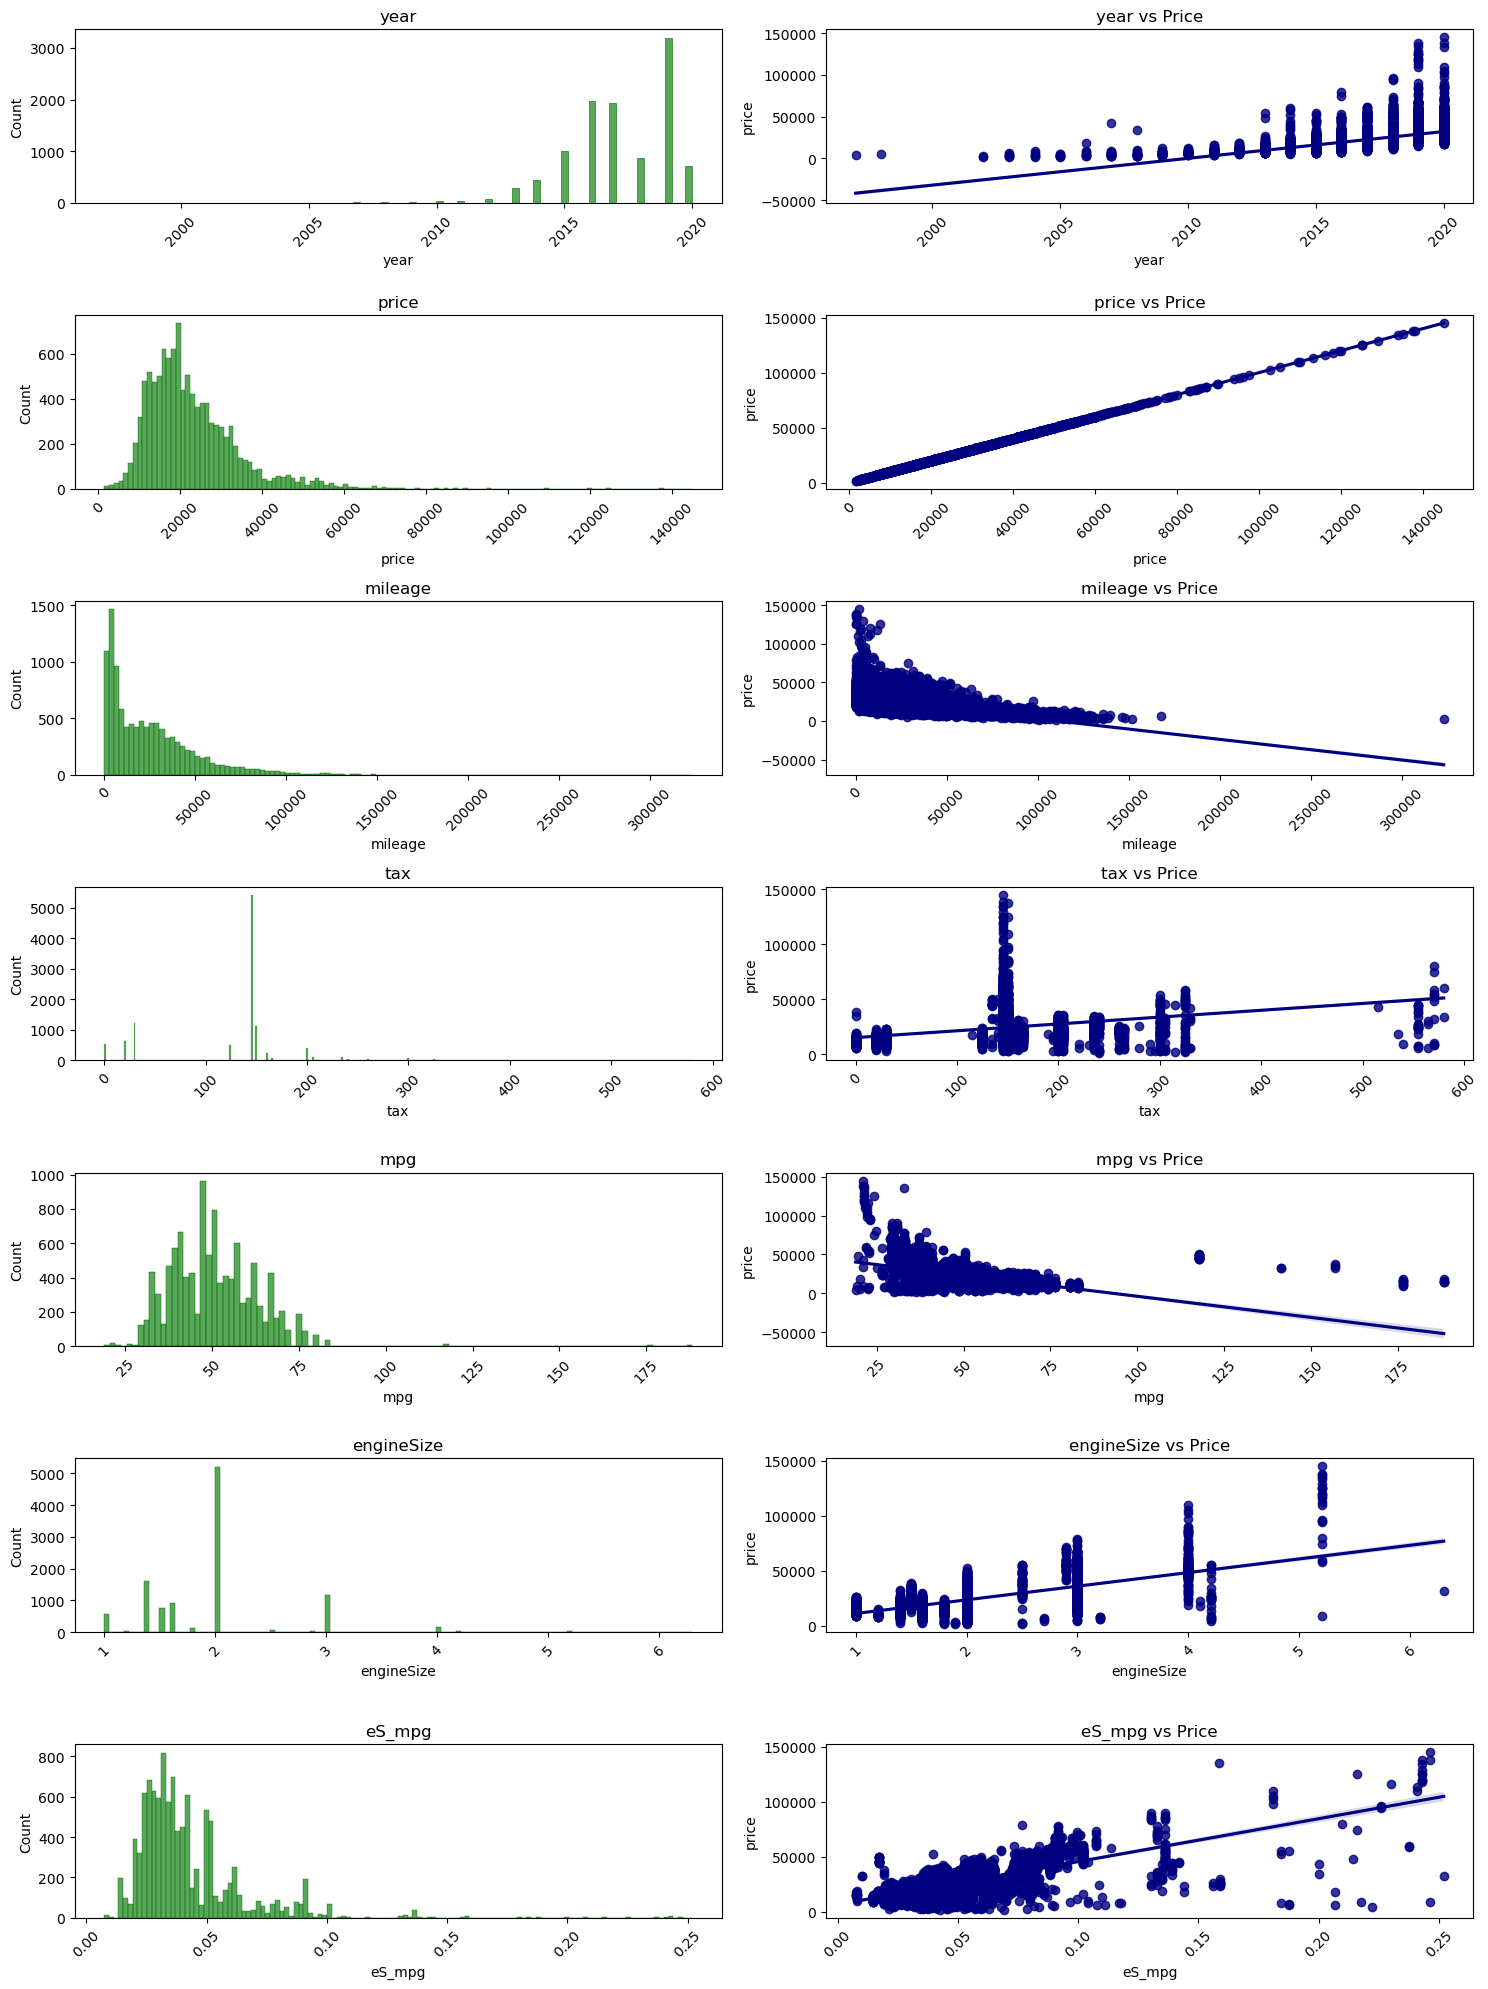

In [13]:
n = len(numerical_features)

fig, axes = plt.subplots(n, 2, figsize = (15, 20))

for i, feature in enumerate(numerical_features):
    
    histplot = sns.histplot(data = audi, x = feature, color = 'forestgreen', edgecolor='darkgreen', ax = axes[i][0])
    histplot.set_title('{}'.format(feature))
    histplot.xaxis.set_tick_params(rotation = 45)
    
    regplot = sns.regplot(data = audi, x = feature, y = 'price', color = 'navy', ax = axes[i][1])
    regplot.set_title('{} vs Price'.format(feature))
    regplot.xaxis.set_tick_params(rotation = 45);

plt.tight_layout()

**Review of logarithmic distribution**

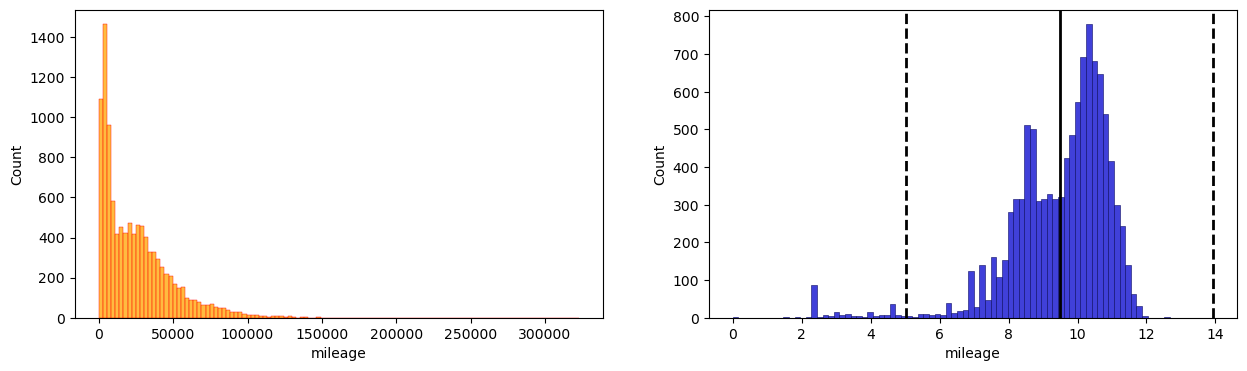

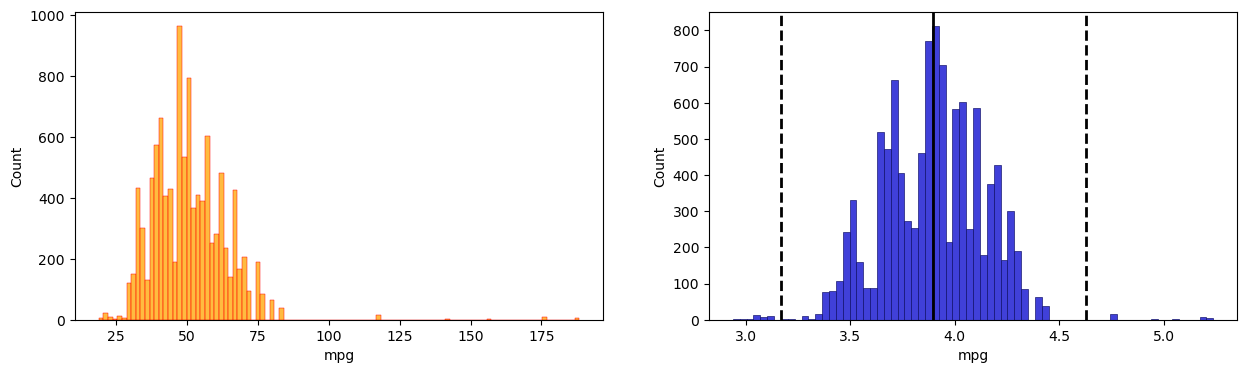

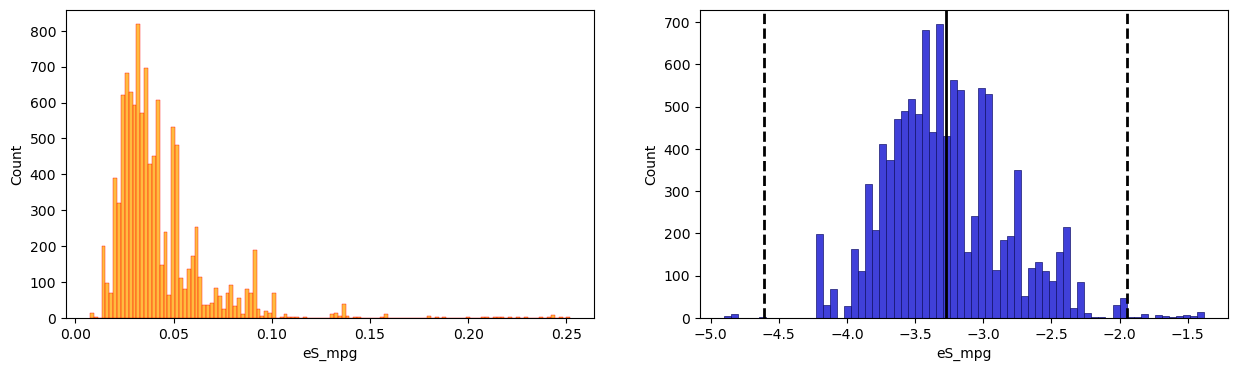

In [14]:
# FEATURE: mileage

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = audi, x = 'mileage', color = 'orange', edgecolor='red', ax = axes[0]);

log_mileage = np.log(audi['mileage'])

sns.histplot(data = log_mileage, color = 'mediumblue', edgecolor='midnightblue', ax = axes[1]);

axes[1].axvline(log_mileage.mean(), color = 'k', lw = 2)
axes[1].axvline(log_mileage.mean()+ 3 *log_mileage.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_mileage.mean()- 3 *log_mileage.std(),
                color='k', ls='--', lw=2);


# FEATURE: fuel consumpion

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = audi, x = 'mpg', color = 'orange', edgecolor='red', ax = axes[0]);

log_mpg = np.log(audi['mpg'])

sns.histplot(data = log_mpg, color = 'mediumblue', edgecolor='midnightblue', ax = axes[1]);

axes[1].axvline(log_mpg.mean(), color = 'k', lw = 2)
axes[1].axvline(log_mpg.mean()+ 3 *log_mpg.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_mpg.mean()- 3 *log_mpg.std(),
                color='k', ls='--', lw=2);


# FEATURE: interelation between fuel consumption and engine volume

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = audi, x = 'eS_mpg', color = 'orange', edgecolor='red', ax = axes[0]);

log_eS_mpg = np.log(audi['eS_mpg'])

sns.histplot(data = log_eS_mpg, color = 'mediumblue', edgecolor='midnightblue', ax = axes[1]);

axes[1].axvline(log_eS_mpg.mean(), color = 'k', lw = 2)
axes[1].axvline(log_eS_mpg.mean()+ 3 *log_eS_mpg.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_eS_mpg.mean()- 3 *log_eS_mpg.std(),
                color='k', ls='--', lw=2);

**Review outliers with z-score method & method Tukey**
Since it is not known weather the cleaned data with by z-score method or cleaned data by method Tukey would show the better results during modeling, different versions would be used.

In [15]:
audi_z = audi.copy()
audi_t = audi.copy()

display(audi_z.head(3))
display(audi_t.head(3))

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4   

     eS_mpg bodyType  
0  0.025271    Other  
1  0.031153    Sedan  
2  0.025271    Other

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4   

     eS_mpg bodyType  
0  0.025271    Other  
1  0.031153    Sedan  
2  0.025271    Other

In [16]:
# Outliers: z-score method

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers_mileage, _ = outliers_z_score(audi_z, 'mileage', log_scale = True)
outliers_mpg, _ = outliers_z_score(audi_z, 'mpg', log_scale = True)
outliers_eS_mpg, _ = outliers_z_score(audi_z, 'eS_mpg', log_scale = True)

print('Outliers Z-score mileage: {}'.format(outliers_mileage.shape[0]))
print('Outliers Z_score mpg: {}'.format(outliers_mpg.shape[0]))
print('Outliers Z-scores eS_mpg: {}'.format(outliers_eS_mpg.shape[0]))
print('\n')

# Outliers: method Tukey

def outliers_iqr(data, feature, left = 2, right = 2, log_scale = False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


outliers_mileage, _ = outliers_iqr(audi_t, 'mileage', log_scale = True)
outliers_mpg, _ = outliers_iqr(audi_t, 'mpg', log_scale = True)
outliers_eS_mpg, _ = outliers_iqr(audi_t, 'eS_mpg', log_scale = True)

print('Outliers Tukey mileage: {}'.format(outliers_mileage.shape[0]))
print('Outliers Tukey mpg: {}'.format(outliers_mpg.shape[0]))
print('Outliers Tukey eS_mpg: {}'.format(outliers_eS_mpg.shape[0]))

Outliers Z-score mileage: 229
Outliers Z_score mpg: 69
Outliers Z-scores eS_mpg: 133


Outliers Tukey mileage: 231
Outliers Tukey mpg: 20
Outliers Tukey eS_mpg: 254


In [17]:
# Remove outliers based on z-score method

outliers_mileage, audi_z_cleaned = outliers_z_score(audi_z, 'mileage', log_scale = True)
outliers_mpg,audi_z_cleaned = outliers_z_score(audi_z, 'mpg', log_scale = True)
outliers_eS_mpg, audi_z_cleaned = outliers_z_score(audi_z, 'eS_mpg', log_scale = True)

print('Shape before cleaning outliers: {}'.format(audi.shape))
print('Shape after Z-score cleaning outliers: {}'.format(audi_z_cleaned.shape))
print('\n')

# Remove outliers based on Tukey method

outliers_mileage, audi_t_cleaned = outliers_iqr(audi_t, 'mileage', log_scale = True)
outliers_mpg, audi_t_cleaned = outliers_iqr(audi_t, 'mpg', log_scale = True)
outliers_eS_mpg, audi_t_cleaned = outliers_iqr(audi_t, 'eS_mpg', log_scale = True)

print('Shape before cleaning outliers: {}'.format(audi.shape))
print('Shape after Tukey cleaning outliers: {}'.format(audi_t_cleaned.shape))

Shape before cleaning outliers: (10668, 11)
Shape after Z-score cleaning outliers: (10535, 11)


Shape before cleaning outliers: (10668, 11)
Shape after Tukey cleaning outliers: (10414, 11)


In [18]:
audi_z_num = audi_z_cleaned.copy()
audi_t_num = audi_t_cleaned.copy()

display(audi_z_num.info())
display(audi_t_num.info())

display(audi_z_num.head(3))
display(audi_t_num.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10535 entries, 0 to 10667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10535 non-null  object 
 1   year          10535 non-null  int64  
 2   price         10535 non-null  int64  
 3   transmission  10535 non-null  object 
 4   mileage       10535 non-null  int64  
 5   fuelType      10535 non-null  object 
 6   tax           10535 non-null  int64  
 7   mpg           10535 non-null  float64
 8   engineSize    10535 non-null  float64
 9   eS_mpg        10535 non-null  float64
 10  bodyType      10535 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 987.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10414 entries, 0 to 10667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10414 non-null  object 
 1   year          10414 non-null  int64  
 2   price         10414 non-null  int64  
 3   transmission  10414 non-null  object 
 4   mileage       10414 non-null  int64  
 5   fuelType      10414 non-null  object 
 6   tax           10414 non-null  int64  
 7   mpg           10414 non-null  float64
 8   engineSize    10414 non-null  float64
 9   eS_mpg        10414 non-null  float64
 10  bodyType      10414 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 976.3+ KB


None

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4   

     eS_mpg bodyType  
0  0.025271    Other  
1  0.031153    Sedan  
2  0.025271    Other

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4   

     eS_mpg bodyType  
0  0.025271    Other  
1  0.031153    Sedan  
2  0.025271    Other

### 4. Encoding categorical columns

In [19]:
import category_encoders as ce

#Ordinal Encoding
ord_enc = ce.OrdinalEncoder()
audi_z_num[['transmission', 'fuelType']] = ord_enc.fit_transform(audi_z_num[['transmission', 'fuelType']])
audi_t_num[['transmission', 'fuelType']] = ord_enc.fit_transform(audi_t_num[['transmission', 'fuelType']])


# OneHotEncoding
ohe_columns = ['bodyType']
audi_z_num = pd.get_dummies(audi_z_num, columns = ohe_columns)
audi_t_num = pd.get_dummies(audi_t_num, columns = ohe_columns)

audi_z_num.drop(['model'], axis = 1, inplace = True)
audi_t_num.drop(['model'], axis = 1, inplace = True)

display(audi_z_num.head())
display(audi_t_num.head())

year  price  transmission  mileage  fuelType  tax   mpg  engineSize  \
0  2017  12500             1    15735         1  150  55.4         1.4   
1  2016  16500             2    36203         2   20  64.2         2.0   
2  2016  11000             1    29946         1   30  55.4         1.4   
3  2017  16800             2    25952         2  145  67.3         2.0   
4  2019  17300             1     1998         1  145  49.6         1.0   

     eS_mpg  bodyType_Coupe  bodyType_Other  bodyType_SUV  bodyType_Sedan  \
0  0.025271               0               1             0               0   
1  0.031153               0               0             0               1   
2  0.025271               0               1             0               0   
3  0.029718               0               0             0               1   
4  0.020161               0               0             0               1   

   bodyType_Sportbacks  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

year  price  transmission  mileage  fuelType  tax   mpg  engineSize  \
0  2017  12500             1    15735         1  150  55.4         1.4   
1  2016  16500             2    36203         2   20  64.2         2.0   
2  2016  11000             1    29946         1   30  55.4         1.4   
3  2017  16800             2    25952         2  145  67.3         2.0   
4  2019  17300             1     1998         1  145  49.6         1.0   

     eS_mpg  bodyType_Coupe  bodyType_Other  bodyType_SUV  bodyType_Sedan  \
0  0.025271               0               1             0               0   
1  0.031153               0               0             0               1   
2  0.025271               0               1             0               0   
3  0.029718               0               0             0               1   
4  0.020161               0               0             0               1   

   bodyType_Sportbacks  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

#### Visualization

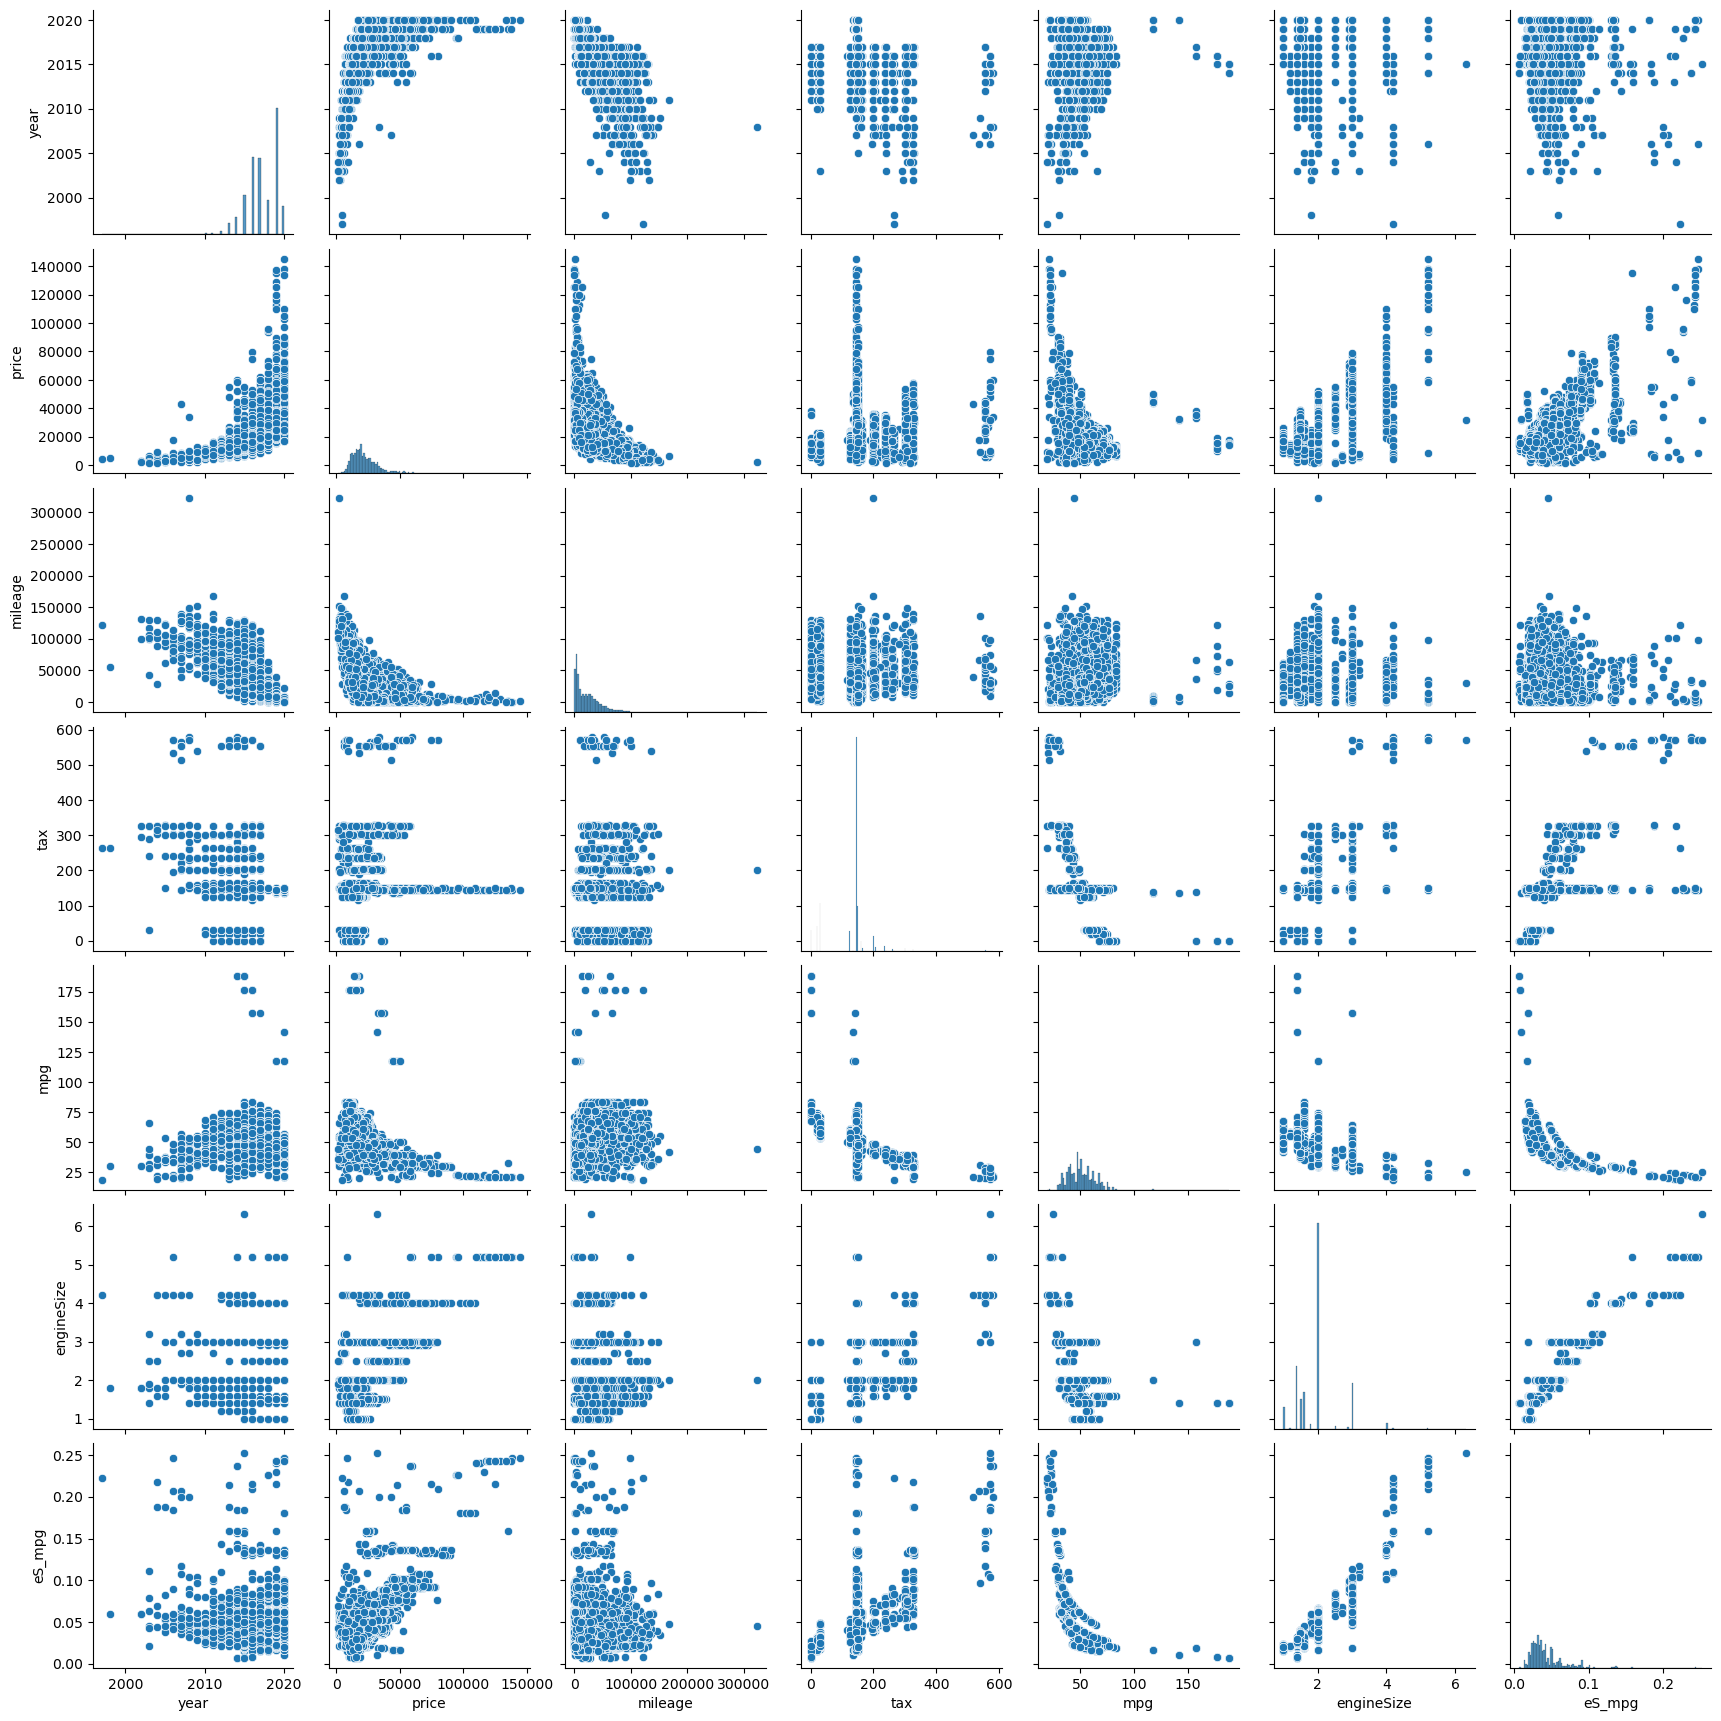

In [20]:
sns.pairplot(audi);

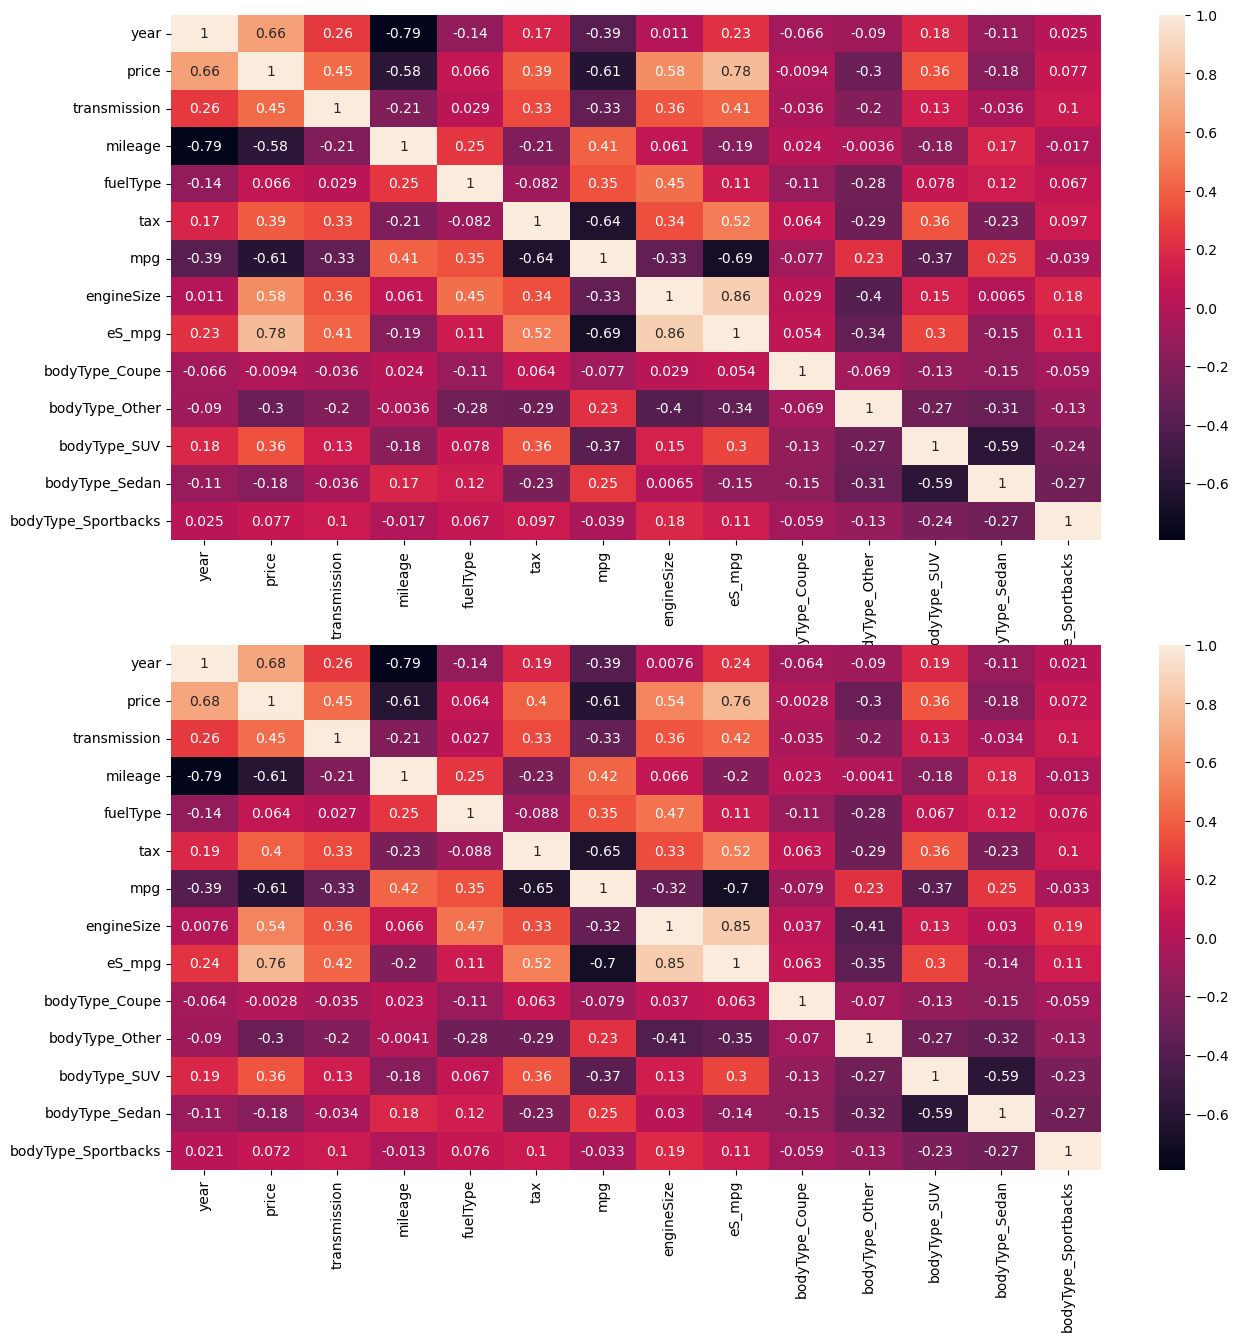

In [21]:
fig, axes = plt.subplots(2, 1, figsize = (15, 15))

sns.heatmap(audi_z_num.corr(), annot = True, ax=axes[0]);
sns.heatmap(audi_t_num.corr(), annot = True, ax=axes[1]);

**Conclusion: there is no multicorelated features, although the correlation coefficiences are better in dataset with z-score removed outliers**

## III. Modeling

### 1. Dataset cleaned by Tukey method

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from itertools import compress


X_t = audi_t_num.drop(['price'], axis = 1)
y_t = audi_t_num['price']

print(X_t.shape)
print(y_t.shape)

(10414, 13)
(10414,)


#### Selecting the most correlated with the target features

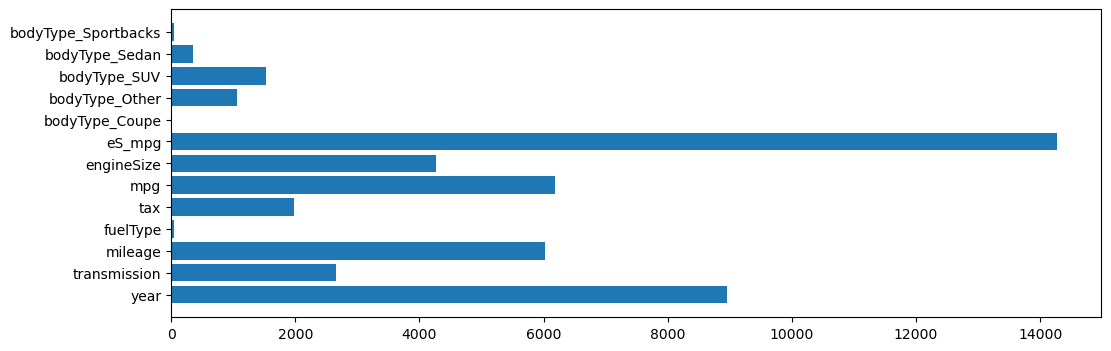

['fuelType', 'bodyType_Coupe']


In [23]:
skb = SelectKBest(f_regression, k = 11).fit(X_t, y_t) # k=11, was chosen following the results on the graphic
mask = skb.get_support()
name_col = X_t.columns.values

X_t_new = list(compress(name_col, mask))

result = list(set(X_t.columns) - set(X_t_new))
score_skb = skb.scores_

fig, ax = plt.subplots(figsize = (12, 4))
plt.barh(name_col, score_skb)
plt.show();

print(result)

In [24]:
# deleting unnecessary features 

#audi_t_new = audi_t_num.drop(['bodyType_Coupe', 'fuelType'], axis = 1)

In [25]:
X = audi_t_num.drop('price', axis = 1)
y = audi_t_num['price']

print(X.shape)
print(y.shape)

(10414, 13)
(10414,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))
print('\n')
print('Train shape: {}'.format(y_train.shape))
print('Test shape: {}'.format(y_test.shape))

Train shape: (8331, 13)
Test shape: (2083, 13)


Train shape: (8331,)
Test shape: (2083,)


In [27]:
# function to calculate and display metrics

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE:  {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

#### First iteration

Train R^2: 0.901
Train MAE: 2210.831
Train MAPE: 10.129


Test R^2: 0.899
Test MAE: 2193.040
Test MAPE:  10.075


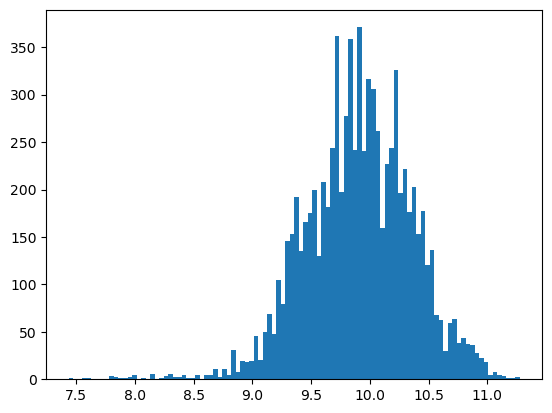

In [28]:
y_train_log = np.log(y_train) # logarithm the target feaure - 'price'

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train_log)

y_train_predict = np.exp(lr.predict(X_train))
y_test_predict = np.exp(lr.predict(X_test))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

plt.hist(y_train_log, bins = 100)
plt.show();

#### Polynomial Features & Normalization: RobustScaler 

Train shape: (8331, 104)
Test shape: (2083, 104)


Train R^2: 0.926
Train MAE: 1902.467
Train MAPE: 8.700


Test R^2: 0.925
Test MAE: 1868.586
Test MAPE:  8.596


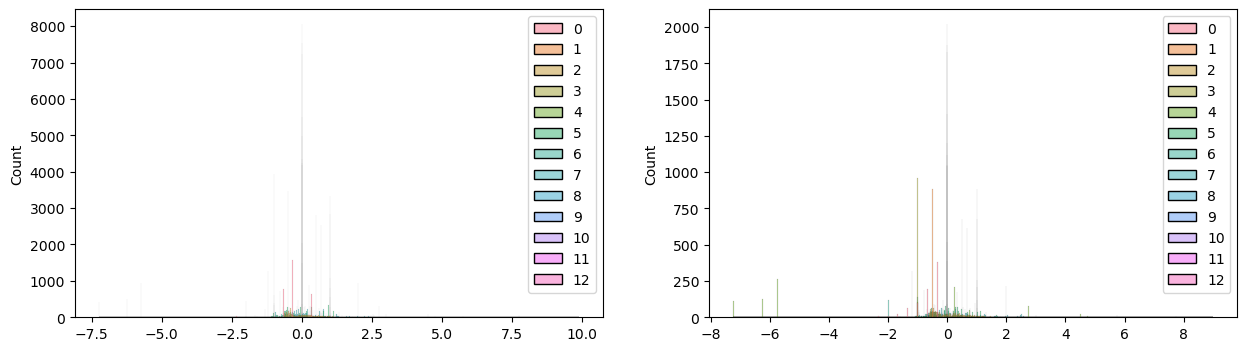

In [29]:
# Normlization
rb_scaler = preprocessing.RobustScaler()
rb_scaler.fit(X_train)

X_train_rb_scaled = rb_scaler.transform(X_train)
X_test_rb_scaled = rb_scaler.transform(X_test)

# Creating Polynomial Features
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train_rb_scaled)

X_train_rb_scaled_poly = poly.transform(X_train_rb_scaled)
X_test_rb_scaled_poly = poly.transform(X_test_rb_scaled)

print('Train shape: {}'.format(X_train_rb_scaled_poly.shape))
print('Test shape: {}'.format(X_test_rb_scaled_poly.shape))
print('\n')

# Visualization
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = X_train_rb_scaled, ax = axes[0]);
sns.histplot(data = X_test_rb_scaled, ax = axes[1]);

# Linear Regression on normalized & polynomial features
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_rb_scaled_poly, y_train_log)

y_train_pred = np.exp(lr_poly.predict(X_train_rb_scaled_poly))
y_test_pred = np.exp(lr_poly.predict(X_test_rb_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

#### Polynomial Features & Normalization: PowerTransformer

In [30]:
from sklearn.preprocessing import PowerTransformer

# Normlization
pt_scaler = PowerTransformer(method = 'yeo-johnson')
pt_scaler.fit(X_train)

X_train_pt_scaled = pt_scaler.transform(X_train)
X_test_pt_scaled = pt_scaler.transform(X_test)

# Creating Polynomial Features
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train_pt_scaled)

X_train_pt_scaled_poly = poly.transform(X_train_pt_scaled)
X_test_pt_scaled_poly = poly.transform(X_test_pt_scaled)

print('Train shape: {}'.format(X_train_pt_scaled_poly.shape))
print('Test shape: {}'.format(X_test_pt_scaled_poly.shape))
print('\n')

# Visualization
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = X_train_pt_scaled, ax = axes[0]);
sns.histplot(data = X_test_pt_scaled, ax = axes[1]);

# Linear Regression on normalized & polynomial features
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_pt_scaled_poly, y_train_log)

y_train_pred = np.exp(lr_poly.predict(X_train_pt_scaled_poly))
y_test_pred = np.exp(lr_poly.predict(X_test_pt_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3310: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Train shape: (8331, 104)
Test shape: (2083, 104)


Train R^2: 0.927
Train MAE: 1886.570
Train MAPE: 8.647


Test R^2: 0.926
Test MAE: 1869.785
Test MAPE:  8.612


#### Polynomial Features & Normalization: QuantileTransform

Train shape: (8331, 104)
Test shape: (2083, 104)


Train R^2: 0.909
Train MAE: 2098.089
Train MAPE: 10.068


Test R^2: 0.908
Test MAE: 2069.725
Test MAPE:  10.032


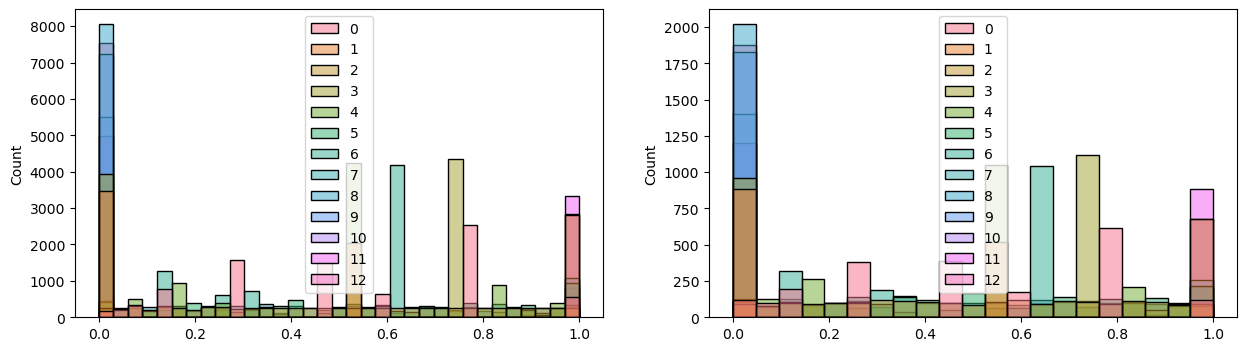

In [31]:
from sklearn.preprocessing import QuantileTransformer

# Normlization
rng = np.random.RandomState(300)
qt_scaler = QuantileTransformer(n_quantiles = 100, output_distribution = 'uniform', random_state = rng)
qt_scaler.fit(X_train)

X_train_qt_scaled = qt_scaler.transform(X_train)
X_test_qt_scaled = qt_scaler.transform(X_test)

# Creating Polynomial Features
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train_qt_scaled)

X_train_qt_scaled_poly = poly.transform(X_train_qt_scaled)
X_test_qt_scaled_poly = poly.transform(X_test_qt_scaled)

print('Train shape: {}'.format(X_train_qt_scaled_poly.shape))
print('Test shape: {}'.format(X_test_qt_scaled_poly.shape))
print('\n')

# Visualization
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = X_train_qt_scaled, ax = axes[0]);
sns.histplot(data = X_test_qt_scaled, ax = axes[1]);

# Linear Regression on normalized & polynomial features
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_qt_scaled_poly, y_train_log)

y_train_pred = np.exp(lr_poly.predict(X_train_qt_scaled_poly))
y_test_pred = np.exp(lr_poly.predict(X_test_qt_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

**Conclusion: the model shows good results with PowerTransformer normalization, but regularization shall apply**

#### L-2 Ridge regularization

In [32]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_pt_scaled_poly, y_train_log)

y_train_predict = np.exp(ridge_lr_poly.predict(X_train_pt_scaled_poly))
y_test_predict = np.exp(ridge_lr_poly.predict(X_test_pt_scaled_poly))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.926
Train MAE: 1891.071
Train MAPE: 8.661


Test R^2: 0.924
Test MAE: 1875.065
Test MAPE:  8.611


**Selection of $\alpha$ parameter**

In [33]:
alpha_list = np.linspace(0.01, 10, 20)

train_scores = []
test_scores = []

for alpha in alpha_list:
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    ridge_lr_poly.fit(X_train_pt_scaled_poly, y_train_log)
    
    y_train_predict_poly = np.exp(ridge_lr_poly.predict(X_train_pt_scaled_poly))
    y_test_predict_poly = np.exp(ridge_lr_poly.predict(X_test_pt_scaled_poly))
    
    train_scores.append(metrics.mean_absolute_error(y_train, y_train_predict_poly))
    test_scores.append(metrics.mean_absolute_error(y_test, y_test_predict_poly))
    

fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(alpha_list, train_scores, label = 'Train')
ax.plot(alpha_list, test_scores, label = 'Test')

ax.set_xlabel('Alpha')
ax.set_ylabel('MAE')
ax.set_xticks(alpha_list)
ax.xaxis.set_tick_params(rotation = 45)
ax.legend();

**Conclusion: the best alpha parameter is 0.01**

In [34]:
ridge_lr_poly = linear_model.Ridge(alpha = 0.01)
ridge_lr_poly.fit(X_train_pt_scaled_poly, y_train_log)

y_train_predict = np.exp(ridge_lr_poly.predict(X_train_pt_scaled_poly))
y_test_predict = np.exp(ridge_lr_poly.predict(X_test_pt_scaled_poly))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.927
Train MAE: 1885.270
Train MAPE: 8.640


Test R^2: 0.925
Test MAE: 1870.174
Test MAPE:  8.607


**Model error spread review and visualization**

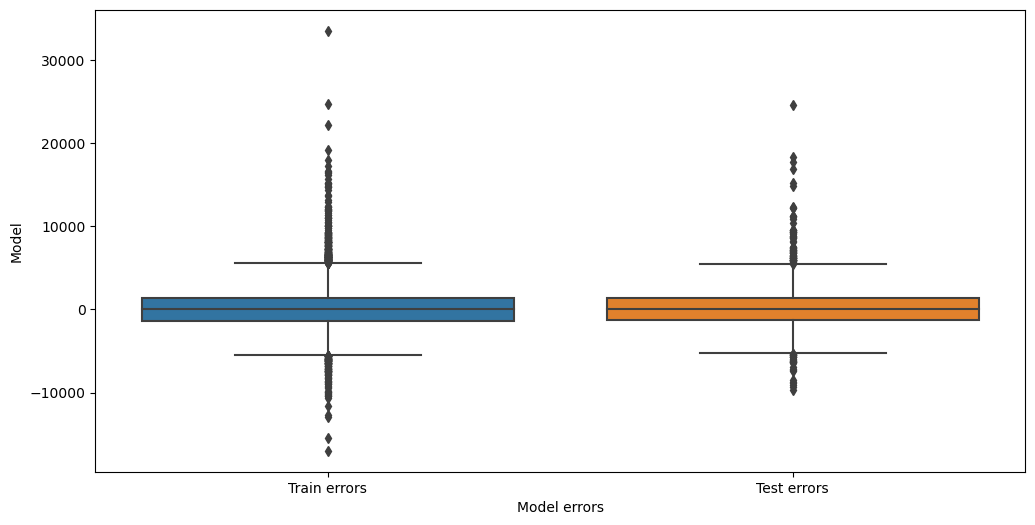

In [35]:
fig, ax = plt.subplots(figsize = (12, 6))

y_train_error = y_train - y_train_predict
y_test_error = y_test - y_test_predict

predict_df = pd.DataFrame({'Train errors' : y_train_error,
                          'Test errors' : y_test_error})

sns.boxplot(data = predict_df, ax = ax)

ax.set_xlabel('Model errors')
ax.set_ylabel('Model');

In [36]:
predict_df.head(20)

Train errors  Test errors
0            NaN -2283.943350
1     107.014987          NaN
2   -1571.816865          NaN
3   -1664.951652          NaN
4   -1834.202978          NaN
5            NaN   747.346270
6    -786.007149          NaN
7     -75.878174          NaN
8   -1937.678096          NaN
9   -1141.631025          NaN
10    362.450328          NaN
11    822.841073          NaN
12    275.202909          NaN
13           NaN   280.576539
14   2146.144344          NaN
15  -2752.457370          NaN
16  -3735.111990          NaN
17           NaN   847.458582
18           NaN -1551.753859
19   3728.163787          NaN

### 2. Dataset cleaned by Z-score method

In [37]:
X_z = audi_z_num.drop(['price'], axis = 1)
y_z = audi_z_num['price']

print(X_z.shape)
print(y_z.shape)

(10535, 13)
(10535,)


#### Selecting the most correlated with the target features

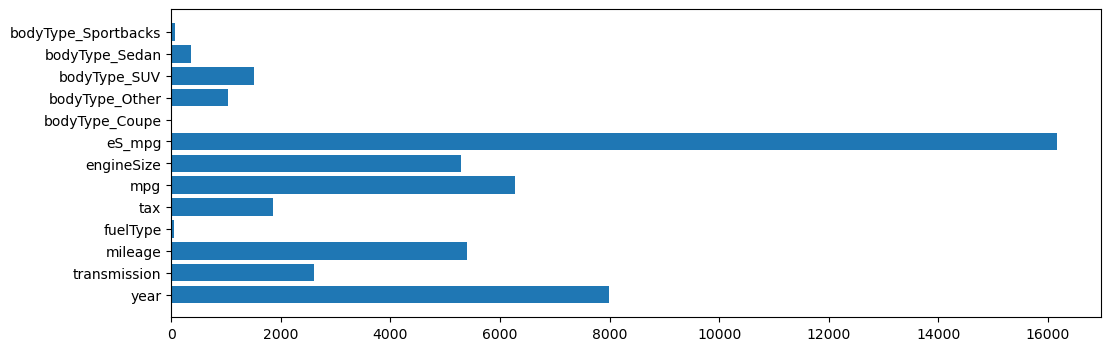

['fuelType', 'bodyType_Coupe']


In [38]:
skb = SelectKBest(f_regression, k = 11).fit(X_z, y_z) # k=11, was chosen following the results on the graphic
mask = skb.get_support()
name_col = X_z.columns.values

X_z_new = list(compress(name_col, mask))

result = list(set(X_z.columns) - set(X_z_new))
score_skb = skb.scores_

fig, ax = plt.subplots(figsize = (12, 4))
plt.barh(name_col, score_skb)
plt.show();

print(result)

In [39]:
X = audi_z_num.drop('price', axis = 1)
y = audi_z_num['price']

print(X.shape)
print(y.shape)

(10535, 13)
(10535,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))
print('\n')
print('Train shape: {}'.format(y_train.shape))
print('Test shape: {}'.format(y_test.shape))

Train shape: (8428, 13)
Test shape: (2107, 13)


Train shape: (8428,)
Test shape: (2107,)


#### First iteration

Train R^2: 0.907
Train MAE: 2246.194
Train MAPE: 10.101


Test R^2: 0.903
Test MAE: 2245.536
Test MAPE:  10.431


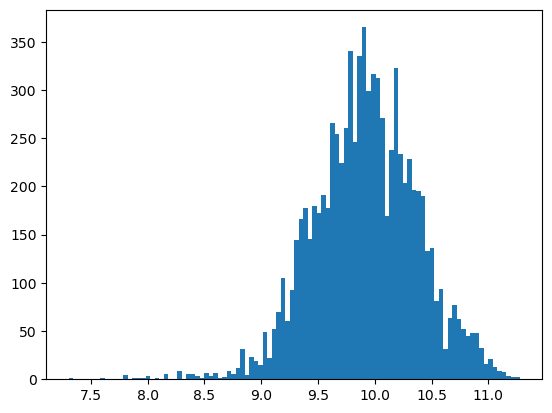

In [41]:
y_train_log = np.log(y_train) # logarithm the target feaure - 'price'

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train_log)

y_train_predict = np.exp(lr.predict(X_train))
y_test_predict = np.exp(lr.predict(X_test))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

plt.hist(y_train_log, bins = 100)
plt.show();

#### Polynomial Features & Normalization: RobustScaler 

Train shape: (8428, 104)
Test shape: (2107, 104)


Train R^2: 0.932
Train MAE: 1915.525
Train MAPE: 8.635


Test R^2: 0.926
Test MAE: 1947.432
Test MAPE:  9.070


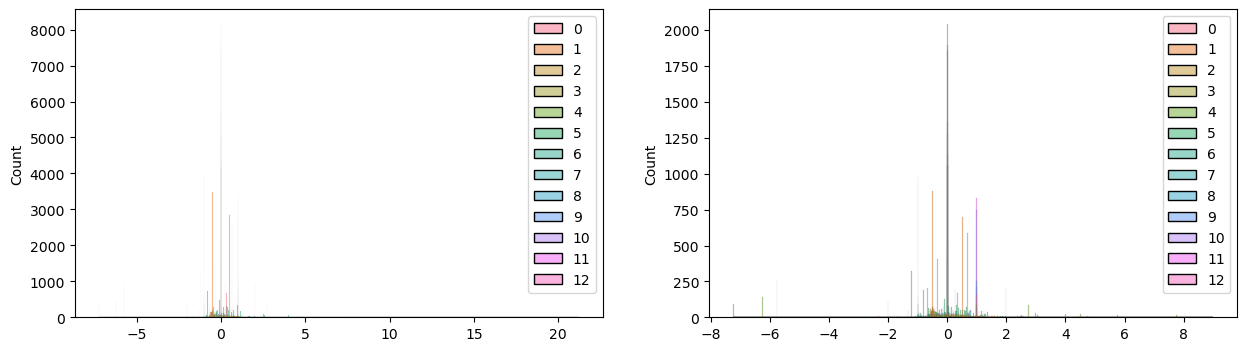

In [42]:
# Normlization
rb_scaler = preprocessing.RobustScaler()
rb_scaler.fit(X_train)

X_train_rb_scaled = rb_scaler.transform(X_train)
X_test_rb_scaled = rb_scaler.transform(X_test)

# Creating Polynomial Features
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train_rb_scaled)

X_train_rb_scaled_poly = poly.transform(X_train_rb_scaled)
X_test_rb_scaled_poly = poly.transform(X_test_rb_scaled)

print('Train shape: {}'.format(X_train_rb_scaled_poly.shape))
print('Test shape: {}'.format(X_test_rb_scaled_poly.shape))
print('\n')

# Visualization
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = X_train_rb_scaled, ax = axes[0]);
sns.histplot(data = X_test_rb_scaled, ax = axes[1]);

# Linear Regression on normalized & polynomial features
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_rb_scaled_poly, y_train_log)

y_train_pred = np.exp(lr_poly.predict(X_train_rb_scaled_poly))
y_test_pred = np.exp(lr_poly.predict(X_test_rb_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

#### Polynomial Features & Normalization: PowerTransformer

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3310: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Train shape: (8428, 104)
Test shape: (2107, 104)


Train R^2: 0.932
Train MAE: 1908.103
Train MAPE: 8.602


Test R^2: 0.925
Test MAE: 1949.149
Test MAPE:  9.114


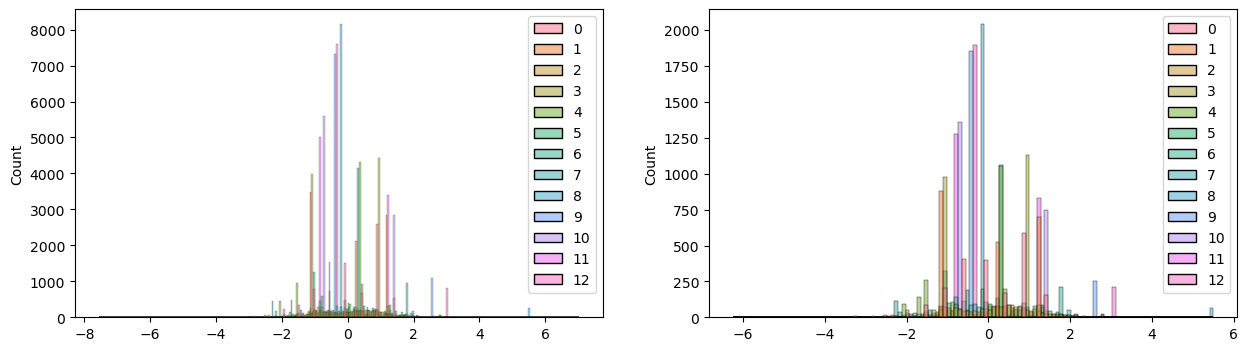

In [43]:
#from sklearn.preprocessing import PowerTransformer

# Normlization
pt_scaler = PowerTransformer(method = 'yeo-johnson')
pt_scaler.fit(X_train)

X_train_pt_scaled = pt_scaler.transform(X_train)
X_test_pt_scaled = pt_scaler.transform(X_test)

# Creating Polynomial Features
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train_pt_scaled)

X_train_pt_scaled_poly = poly.transform(X_train_pt_scaled)
X_test_pt_scaled_poly = poly.transform(X_test_pt_scaled)

print('Train shape: {}'.format(X_train_pt_scaled_poly.shape))
print('Test shape: {}'.format(X_test_pt_scaled_poly.shape))
print('\n')

# Visualization
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = X_train_pt_scaled, ax = axes[0]);
sns.histplot(data = X_test_pt_scaled, ax = axes[1]);

# Linear Regression on normalized & polynomial features
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_pt_scaled_poly, y_train_log)

y_train_pred = np.exp(lr_poly.predict(X_train_pt_scaled_poly))
y_test_pred = np.exp(lr_poly.predict(X_test_pt_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

#### Polynomial Features & Normalization: QuantileTransformer

Train shape: (8428, 104)
Test shape: (2107, 104)


Train R^2: 0.901
Train MAE: 2223.506
Train MAPE: 10.210


Test R^2: 0.885
Test MAE: 2276.438
Test MAPE:  10.925


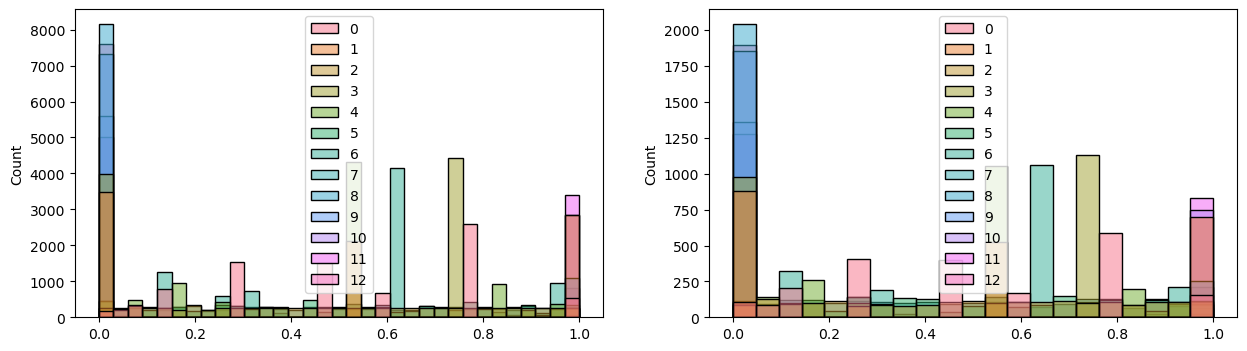

In [44]:
#from sklearn.preprocessing import QuantileTransformer

# Normlization
rng = np.random.RandomState(300)
qt_scaler = QuantileTransformer(n_quantiles = 100, output_distribution = 'uniform', random_state = rng)
qt_scaler.fit(X_train)

X_train_qt_scaled = qt_scaler.transform(X_train)
X_test_qt_scaled = qt_scaler.transform(X_test)

# Creating Polynomial Features
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train_qt_scaled)

X_train_qt_scaled_poly = poly.transform(X_train_qt_scaled)
X_test_qt_scaled_poly = poly.transform(X_test_qt_scaled)

print('Train shape: {}'.format(X_train_qt_scaled_poly.shape))
print('Test shape: {}'.format(X_test_qt_scaled_poly.shape))
print('\n')

# Visualization
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(data = X_train_qt_scaled, ax = axes[0]);
sns.histplot(data = X_test_qt_scaled, ax = axes[1]);

# Linear Regression on normalized & polynomial features
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_qt_scaled_poly, y_train_log)

y_train_pred = np.exp(lr_poly.predict(X_train_qt_scaled_poly))
y_test_pred = np.exp(lr_poly.predict(X_test_qt_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

#### L-2 Ridge regularization

In [45]:
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_pt_scaled_poly, y_train_log)

y_train_predict = np.exp(ridge_lr_poly.predict(X_train_pt_scaled_poly))
y_test_predict = np.exp(ridge_lr_poly.predict(X_test_pt_scaled_poly))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.933
Train MAE: 1904.647
Train MAPE: 8.586


Test R^2: 0.925
Test MAE: 1950.717
Test MAPE:  9.104


**Selection of $\alpha$ parameter**

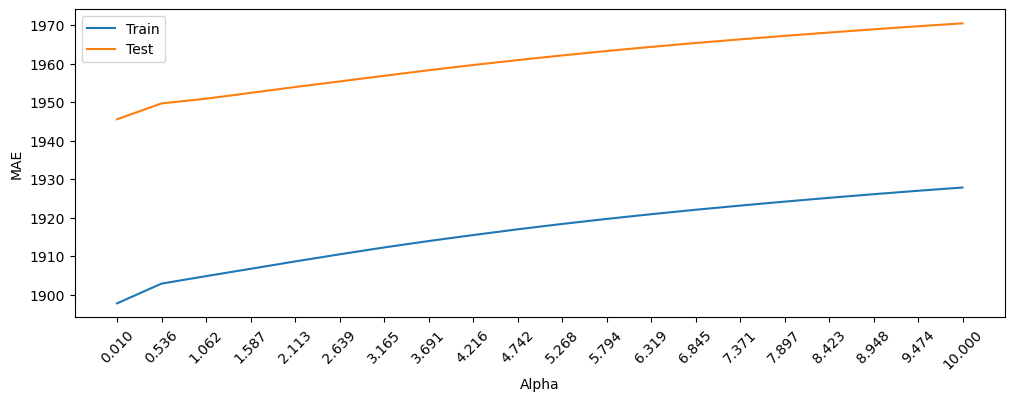

In [46]:
alpha_list = np.linspace(0.01, 10, 20)

train_scores = []
test_scores = []

for alpha in alpha_list:
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    ridge_lr_poly.fit(X_train_pt_scaled_poly, y_train_log)
    
    y_train_predict_poly = np.exp(ridge_lr_poly.predict(X_train_pt_scaled_poly))
    y_test_predict_poly = np.exp(ridge_lr_poly.predict(X_test_pt_scaled_poly))
    
    train_scores.append(metrics.mean_absolute_error(y_train, y_train_predict_poly))
    test_scores.append(metrics.mean_absolute_error(y_test, y_test_predict_poly))
    

fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(alpha_list, train_scores, label = 'Train')
ax.plot(alpha_list, test_scores, label = 'Test')

ax.set_xlabel('Alpha')
ax.set_ylabel('MAE')
ax.set_xticks(alpha_list)
ax.xaxis.set_tick_params(rotation = 45)
ax.legend();

In [47]:
ridge_lr_poly = linear_model.Ridge(alpha = 0.01)
ridge_lr_poly.fit(X_train_pt_scaled_poly, y_train_log)

y_train_predict = np.exp(ridge_lr_poly.predict(X_train_pt_scaled_poly))
y_test_predict = np.exp(ridge_lr_poly.predict(X_test_pt_scaled_poly))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.933
Train MAE: 1897.807
Train MAPE: 8.568


Test R^2: 0.926
Test MAE: 1945.559
Test MAPE:  9.103


**Model error spread review and visualization**

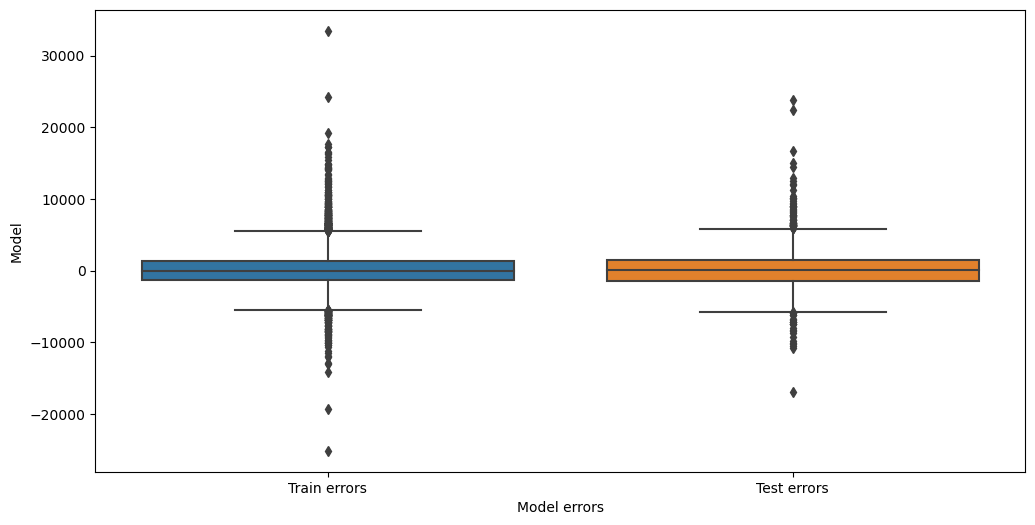

In [48]:
fig, ax = plt.subplots(figsize = (12, 6))

y_train_error = y_train - y_train_predict
y_test_error = y_test - y_test_predict

predict_df = pd.DataFrame({'Train errors' : y_train_error,
                          'Test errors' : y_test_error})

sns.boxplot(data = predict_df, ax = ax)

ax.set_xlabel('Model errors')
ax.set_ylabel('Model');

In [49]:
predict_df.head(20)

Train errors  Test errors
0            NaN -2198.769971
1      42.272992          NaN
2   -1621.804820          NaN
3   -1757.590776          NaN
4   -1660.214829          NaN
5            NaN   595.044990
6    -817.605170          NaN
7    -202.220728          NaN
8   -1851.355543          NaN
9   -1175.350488          NaN
10    433.936377          NaN
11    810.959861          NaN
12    284.216910          NaN
13           NaN   400.556006
14   2296.084108          NaN
15  -2719.809150          NaN
16  -3740.440905          NaN
17           NaN   564.571769
18           NaN -1540.889785
19   3523.184344          NaN

## IV. Conclusion

The best result is received on the data-set cleaned from outliers with method Tukey, using normalization - PowerTransformer. 